
# Jupiter/IPython notebook widgets

<br />

### Ivan Zimine 
### vanzaj@{gmail,fb,tw,github}

<br />

### PyDataSG meetup, 13 Oct 2015


In [1]:
from IPython.display import HTML, display
import ipywidgets as wdg

def embed_url(url, width=800, height=450):
    src='<iframe src="%s"  width="%d" height="%d"></iframe>' % (url, 800, 450)
    display(HTML(src))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
import nibabel as nib
nimg = nib.load('../data/anon_anatomy.nii.gz')
data = nimg.get_data().astype(nimg.get_data_dtype())

('Data info:', <type 'numpy.ndarray'>, dtype('uint8'), (57, 67, 56))


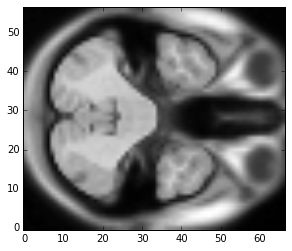

In [4]:
print("Data info:", type(data), data.dtype, data.shape)
 
plt.set_cmap('gray');
plt.imshow( data[:, :, 10], origin='lower');

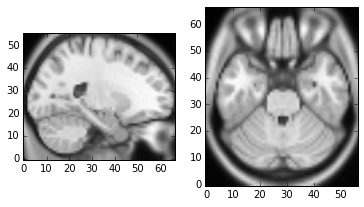

In [5]:
def show_vol(axe1=0, axe2=0):
    plt.subplot(121)
    im = data[axe1, :,:]
    plt.imshow(im.T, origin='lower')
    
    plt.subplot(122)
    im = data[:, :, axe2]
    plt.imshow(im.T, origin='lower')
    
show_vol(20, 15)

<function __main__.show_vol>

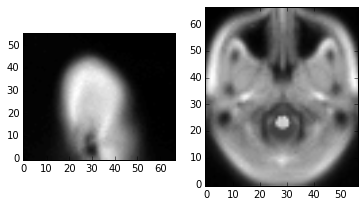

In [6]:
Nx, Ny, Nz = data.shape

wdg.interact(show_vol, axe1=(0, Nx-1), axe2=(0, Nz-1))

# code cells + markdown = ❤ ❤ ❤

everybody loves math: $ax^2 + bx + c =0$

In [7]:
txt = "Saluton mondo!"
print(txt)

Saluton mondo!


In [8]:
! python -m this | head -5 | tail -3

Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.


In [9]:
embed_url('https://en.wikipedia.org/wiki/Literate_programming')

In [10]:
embed_url('https://www.oreilly.com/ideas/jupyter-at-oreilly')

In [11]:
embed_url('http://worrydream.com/ExplorableExplanations/')

In [12]:
import ipywidgets as wdg

In [13]:
def f(x=1):
    print('OMG!' * x)

In [14]:
wdg.interact(f, x=5)

OMG!OMG!OMG!OMG!OMG!


<function __main__.f>

In [15]:
wdg.interact(f, x=wdg.IntSlider(min=1, max=10, step=1, value=5))

OMG!OMG!OMG!OMG!OMG!


<function __main__.f>

In [16]:
@wdg.interact(text='')
def h(text=''):
    res = ' '.join(np.random.permutation(text.split()))
    print(res)

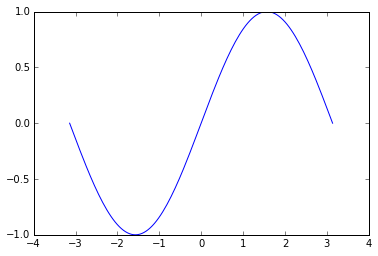

In [17]:
x = np.linspace(-np.pi, np.pi, 128)

@wdg.interact(freq=(1,10))
def plot_sine(freq=1):
    y = np.sin(x*freq)
    plt.plot(x, y)

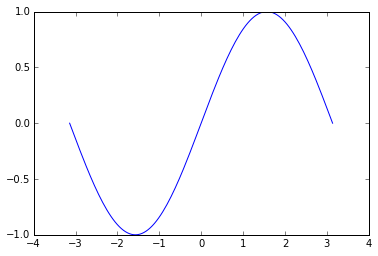

In [18]:
@wdg.interact(freq=(1,10), show_y1=False)
def plot_sine(freq=1, show_y1=False):
    y = np.sin(x*freq)
    plt.plot(x, y)
    if show_y1:
        y1 = 0.5 * np.cos(x*freq)
        plt.plot(x, y1)

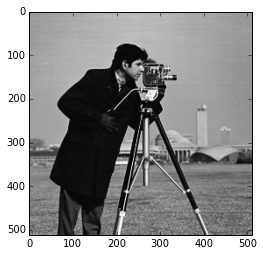

In [20]:
import skimage.data

img = skimage.data.camera()
plt.imshow(img, cmap=plt.get_cmap('gray'))

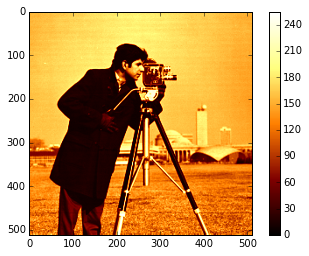

In [21]:
cnames = [name for name in plt.colormaps() if not name.endswith('_r') and name[0] > 'Z']

@wdg.interact(cname=cnames)
def showimg(cname=''):
    plt.imshow(img, cmap=plt.get_cmap(cname))
    plt.colorbar()

10

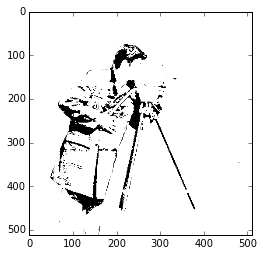

In [23]:
plt.set_cmap(plt.get_cmap('gray'))
def img_thres(thres=10):
    msk = img > thres
    plt.imshow(msk)
    return thres

iw = wdg.interactive(img_thres, thres=(0,255))
display(iw)


In [24]:
print(iw.result)

10


In [25]:
import pandas as pd

df = pd.read_csv("../data/2013-Nov_chicago-salaries.csv.gz", compression='gzip')
df.head()

,Name,Position Title,Department,Employee Annual Salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,$85512.00
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,$75372.00
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,$80916.00
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,$99648.00
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,$89440.00


In [26]:
df = pd.read_csv("../data/2013-Nov_chicago-salaries.csv.gz", compression='gzip',
                 header=False, names=['name', 'title', 'department', 'salary'], 
                 converters={"salary": lambda x: float(x.replace('$', ''))})

df.head()

,name,title,department,salary
0,"AARON, ELVIA J",WATER RATE TAKER,WATER MGMNT,85512
1,"AARON, JEFFERY M",POLICE OFFICER,POLICE,75372
2,"AARON, KIMBERLEI R",CHIEF CONTRACT EXPEDITER,GENERAL SERVICES,80916
3,"ABAD JR, VICENTE M",CIVIL ENGINEER IV,WATER MGMNT,99648
4,"ABBATACOLA, ROBERT J",ELECTRICAL MECHANIC,AVIATION,89440


In [30]:
def sortdf(column='name', ascend=True):
    newdf = df.sort(column, ascending=ascend).head(10)
    return newdf

colnames = list(df.columns)
wdg.interact(sortdf, column=colnames, ascend=False)

,name,title,department,salary
29364,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,80724.0
29363,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,78012.0
29362,"ZYGOWICZ, PETER J",POLICE OFFICER,POLICE,78012.0
29361,"ZYGADLO, MICHAEL J",FRM OF MACHINISTS - AUTOMOTIVE,GENERAL SERVICES,96553.6
29360,"ZYGADLO, JOHN P",MACHINIST (AUTOMOTIVE),GENERAL SERVICES,91353.6
29359,"ZYDEK, BRYAN",POLICE OFFICER,POLICE,75372.0
29358,"ZWOLSKI, MARY L",POLICE OFFICER,POLICE,80724.0
29357,"ZWOLFER, MATTHEW W",FIREFIGHTER-EMT,FIRE,81906.0
29356,"ZWIT, JEFFREY J",POLICE OFFICER,POLICE,78012.0
29355,"ZWIESLER, MATTHEW",AIRPORT OPERATIONS SUPVSR I,AVIATION,67128.0


<function __main__.sortdf>

In [31]:
iw = wdg.interactive(sortdf, 
                     ascend=wdg.Checkbox(description="Ascend:", value=True),
                     column=wdg.Dropdown(description="Column:", options=colnames, value='name'))

ctrl = wdg.HBox(sorted(iw.children))
ctrl.on_displayed(lambda x: sortdf(**iw.kwargs))
display(ctrl)

,name,title,department,salary
29364,"ZYRKOWSKI, CARLO E",POLICE OFFICER,POLICE,80724.0
29363,"ZYMANTAS, MARK E",POLICE OFFICER,POLICE,78012.0
29362,"ZYGOWICZ, PETER J",POLICE OFFICER,POLICE,78012.0
29361,"ZYGADLO, MICHAEL J",FRM OF MACHINISTS - AUTOMOTIVE,GENERAL SERVICES,96553.6
29360,"ZYGADLO, JOHN P",MACHINIST (AUTOMOTIVE),GENERAL SERVICES,91353.6
29359,"ZYDEK, BRYAN",POLICE OFFICER,POLICE,75372.0
29358,"ZWOLSKI, MARY L",POLICE OFFICER,POLICE,80724.0
29357,"ZWOLFER, MATTHEW W",FIREFIGHTER-EMT,FIRE,81906.0
29356,"ZWIT, JEFFREY J",POLICE OFFICER,POLICE,78012.0
29355,"ZWIESLER, MATTHEW",AIRPORT OPERATIONS SUPVSR I,AVIATION,67128.0


In [32]:
def sub_df(columns='name,title', ascend=True):
    try:
        fields = columns.split(',')
        if len(fields) > 0:
            newdf = df[fields].head(10)
    except Exception:
        newdf = df
    display(newdf)
    
wdg.interact(sub_df, column='', ascend=True)

,name,department,salary
0,"AARON, ELVIA J",WATER MGMNT,85512
1,"AARON, JEFFERY M",POLICE,75372
2,"AARON, KIMBERLEI R",GENERAL SERVICES,80916
3,"ABAD JR, VICENTE M",WATER MGMNT,99648
4,"ABBATACOLA, ROBERT J",AVIATION,89440
5,"ABBATEMARCO, JAMES J",FIRE,78012
6,"ABBATE, TERRY M",POLICE,80724
7,"ABBOTT, BETTY L",FAMILY & SUPPORT,2756
8,"ABBOTT, LYNISE M",POLICE,41784
9,"ABBRUZZESE, WILLIAM J",IPRA,62832
